In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train=pd.read_csv('https://drive.google.com/uc?export=download&id=1KA7mKUmQv4PrF-qMFrH35LN6q_i56Bf1', dtype={'StateHoliday':'str'})
store=pd.read_csv('https://drive.google.com/uc?export=download&id=1_o04Vnqzo3v-MTk20MF3OMw2QFz0Fbo0')
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [30]:
#데이터 삭제 open = 0인 데이터들
# 그리고 평균내서 store데이터에 추가 ~ 변수와 상관관계 파악하기 위해서 
train.drop(train[train['Open']==0].index,inplace=True)

In [31]:
train.reset_index(drop=True,inplace=True)

def find_outlier(data):
    Q1 , Q3 = np.percentile(data,[25,75])
    IQR = Q3 - Q1
    Over_outlier = Q3 + 1.5*IQR
    Low_outlier = Q1 - 1.5*IQR
    location = np.where((data>Over_outlier)|(data<Low_outlier))
    result = [list(location[0]),len(list(location[0]))]
    return result

locationOfOutlier  =  find_outlier(train['Sales'])[0]
numOfOutlier = find_outlier(train['Sales'])[1]

print("Number of Outlier is " , numOfOutlier)
print("percentage of Outlier of whole data ", (numOfOutlier/len(train))*100,"%")

train.drop(index = locationOfOutlier,inplace = True)
train

Number of Outlier is  30769
percentage of Outlier of whole data  3.6439236752598316 %


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,1,0,a,1
844388,733,2,2013-01-01,10765,2377,1,0,a,1
844389,769,2,2013-01-01,5035,1248,1,0,a,1
844390,948,2,2013-01-01,4491,1039,1,0,a,1


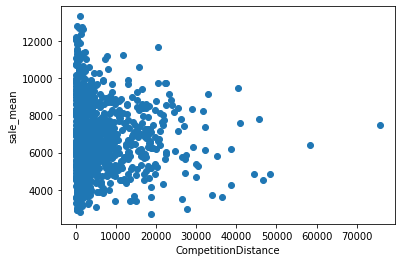

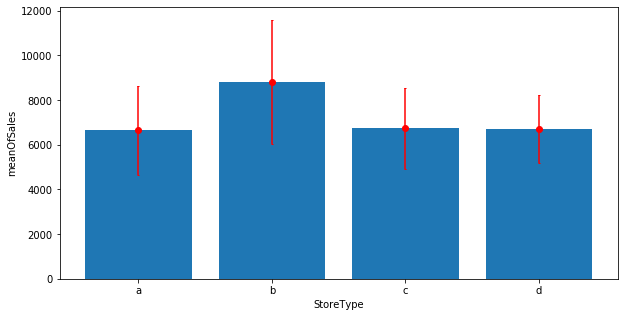

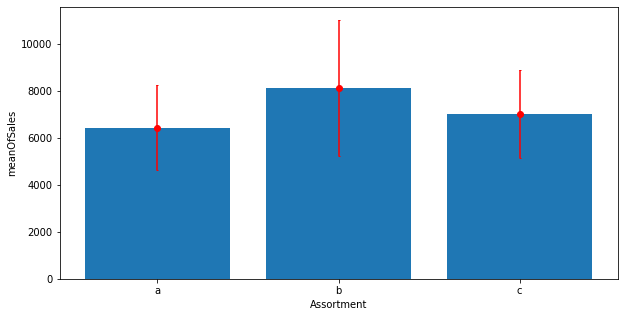

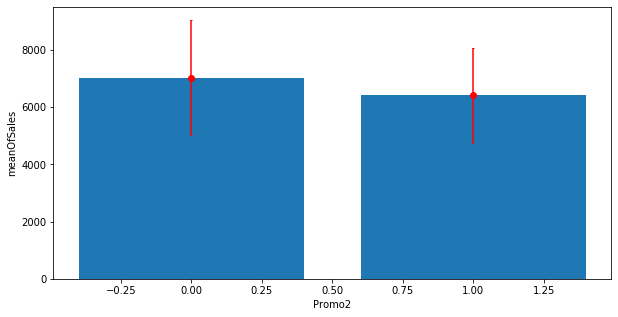

In [32]:
# befor merge data s
# f-test & Data  for store data Assortment and StoreType
from scipy.stats import f_oneway
import matplotlib.pyplot as plt


sale_mean = train.groupby('Store')['Sales'].mean()
store['sale_mean'] = sale_mean.values

catvar = ['StoreType','Assortment','Promo2']

f_value ={}
for i in catvar:
    groups = [x[1].values for x in store.groupby([i])['sale_mean']]
    f_value[i] = f_oneway(*groups)
f_value

plt.scatter(store['CompetitionDistance'], store['sale_mean'])
plt.xlabel('CompetitionDistance')
plt.ylabel('sale_mean')


for i in catvar:
    sale_mean = store.groupby(i)['sale_mean'].mean()
    sale_std = store.groupby(i)['sale_mean'].std()
    plt.figure(figsize=(10,5))
    plt.xlabel(i)
    plt.ylabel('meanOfSales')
    plt.bar(range(len(sale_mean)),sale_mean)
    plt.errorbar(sale_mean.index,sale_mean,yerr=sale_std, fmt='o', c='r',ecolor='r',capthick=1,capsize=1)

    

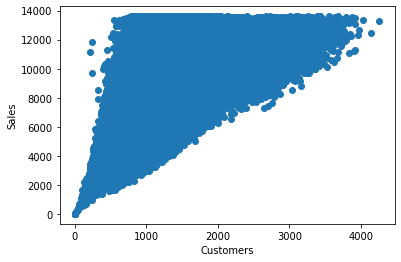

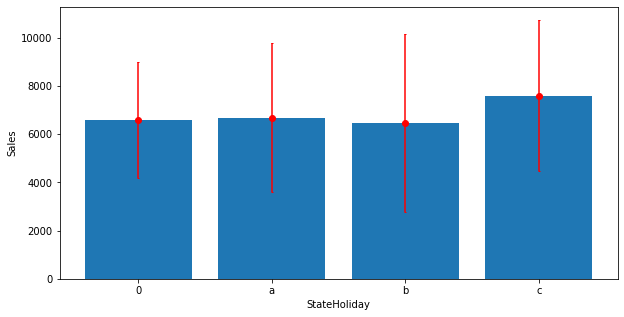

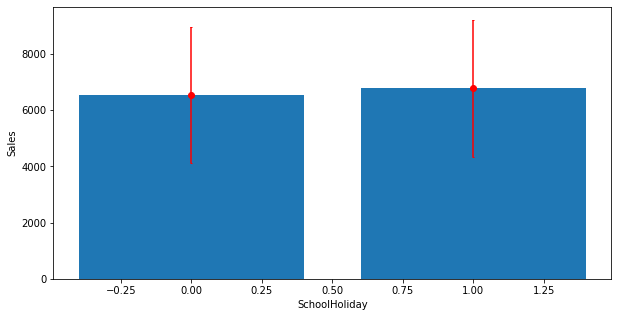

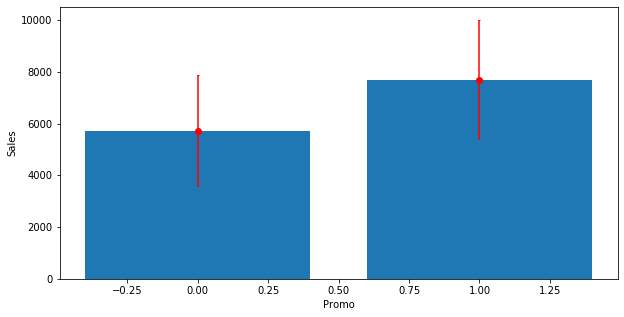

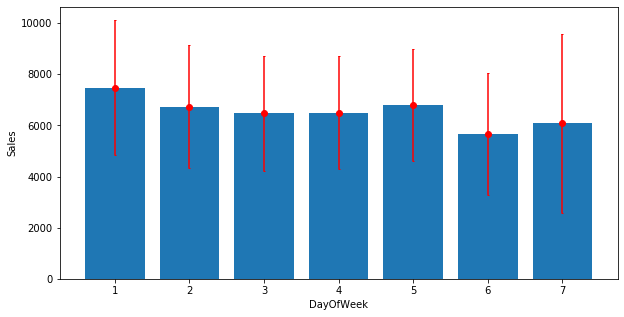

In [33]:
catvar =['StateHoliday','SchoolHoliday','Promo','DayOfWeek']


f_value ={}
for i in catvar:
    groups = [x[1].values for x in train.groupby([i])['Sales']]
    f_value[i] = f_oneway(*groups)
f_value

plt.scatter(train['Customers'], train['Sales'])
plt.xlabel('Customers')
plt.ylabel('Sales')

for i in catvar:
    sale_mean = train.groupby(i)['Sales'].mean()
    sale_std = train.groupby(i)['Sales'].std()
    plt.figure(figsize=(10,5))
    plt.xlabel(i)
    plt.ylabel('Sales')
    if i == 'DayOfWeek':
        plt.bar(range(1,len(sale_mean)+1),sale_mean)
    else:
        plt.bar(range(len(sale_mean)),sale_mean)
    plt.errorbar(sale_mean.index,sale_mean,yerr=sale_std, fmt='o', c='r',ecolor='r',capthick=1,capsize=1)
    

In [34]:
store = store.drop(columns = ['CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'sale_mean'])
train = pd.merge(train,store, on = "Store")

catvar = ['StoreType','Assortment','Promo','DayOfWeek']

for c in catvar:
    dummy = pd.get_dummies(train[c],prefix = c, drop_first = True)
    train = pd.concat((train,dummy),axis=1)

In [35]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'Promo2',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Promo_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7'],
      dtype='object')

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('Sales ~Customers+StoreType_b+StoreType_c+StoreType_d+Assortment_b+Assortment_c+Promo_1+DayOfWeek_2+DayOfWeek_3+DayOfWeek_4+DayOfWeek_5+DayOfWeek_6+DayOfWeek_7',train, return_type = 'dataframe')
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["explanatory variables"] = X.columns
vif


,vif value,explanatory variables
0,17.356940,Intercept
1,1.364152,Customers
2,2.680438,StoreType_b
3,1.089902,StoreType_c
4,1.233840,StoreType_d
5,2.509553,Assortment_b
6,1.079218,Assortment_c
7,1.240741,Promo_1
8,1.744583,DayOfWeek_2
9,1.748424,DayOfWeek_3


In [37]:
train = train.sort_values('Store')

X_train = train.loc[train['Date']<'2015-01-01']
X_train = X_train.drop(catvar+['Sales','Date','Store','SchoolHoliday','StateHoliday','Open','Promo2'],axis=1)
X_train['intercept'] = 1


y_train = train.loc[train['Date']<'2015-01-01']
y_train = y_train['Sales']


X_vaild = train.loc[train['Date']>='2015-01-01']
X_vaild = X_vaild.drop(catvar+['Sales','Date','Store','SchoolHoliday','StateHoliday','Open','Promo2'],axis=1)
X_vaild['intercept'] = 1


y_vaild = train.loc[train['Date']>='2015-01-01']
y_vaild = y_vaild['Sales']

X_train.reset_index(drop = True,inplace=True)
y_train.reset_index(drop = True,inplace=True)
X_vaild.reset_index(drop = True,inplace=True)
y_vaild.reset_index(drop = True,inplace=True)

In [38]:
import statsmodels.api as sm

model1 = sm.OLS(y_train,X_train)
result = model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 1.704e+05
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:25:14   Log-Likelihood:            -5.2825e+06
No. Observations:              624629   AIC:                         1.057e+07
Df Residuals:                  624615   BIC:                         1.057e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Customers        6.9983      0.005   1286.834      0.000       6.988       7.009
StoreType_b  -2289.7321     19.560   -117.059      0.000   -2328.070   -2251.394
StoreType_c   -178.3845      4.404    -40.504      0.000    -187.016    -169.753
StoreType_d   1102.3546      3.461    318.495      0.000    1095.571    1109.138
Assortment_b -4248.9158     24.283   -174.972      0.000   -4296.510   -4201.321
Assortment_c   319.6375      3.004    106.418      0.000     313.751     325.524
Promo_1       1177.5872      3.238    363.724      0.000    1171.242    1183.933
DayOfWeek_2   -350.7921      5.053    -69.427      0.000    -360.695    -340.889
DayOfWeek_3   -466.7062      5.073    -92.000      0.000    -476.649    -456.764
DayOfWeek_4   -538.7416      5.133   -104.963      0.000    -548.801    -528.682
DayOfWeek_5   -386.7261      5.088    -76.004      0.000    -396.699    -376.753
DayOfWeek_6   -114.8070      5.322    -21.574      0.000    -125.237    -104.377
DayOfWeek_7   -121.3058     24.790     -4.893      0.000    -169.894     -72.718
intercept      902.4699      5.979    150.947      0.000     890.752     914.188
==============================================================================
Omnibus:                    32331.370   Durbin-Watson:                   0.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77318.492
Skew:                           0.318   Prob(JB):                         0.00
Kurtosis:                       4.602   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression,Lasso

linear_model = LinearRegression()
lasso_model = Lasso(alpha = 1.0)

train_group = train.loc[train['Date']<'2015-01-01']
train_group = train_group['Store']
linear_score = []
lasso_score = []


gkf = GroupKFold(n_splits=train_group.nunique())

for train_index,test_index in gkf.split(X_train,y_train,np.array(train_group)):# y information is quiet useful
    X1_train, X1_test= X_train.iloc[train_index], X_train.iloc[test_index]
    y1_train, y1_test= y_train.iloc[train_index], y_train.iloc[test_index]
    linear_model.fit(X1_train,y1_train)
    lasso_model.fit(X1_train,y1_train)
    linear_score.append(linear_model.score(X1_test,y1_test))
    lasso_score.append(lasso_model.score(X1_test,y1_test))

In [41]:
LinearScore = list(filter(lambda x: x>-10, linear_score))
LassoScore = list(filter(lambda x: x>-10, lasso_score))

LinearScore  = pd.DataFrame(LinearScore,columns = ['ScoreOfLinearModel'])
LassoScore = pd.DataFrame(LassoScore,columns = ['ScoreOfLassoModel'])

print(LinearScore['ScoreOfLinearModel'].describe(),"\n\n\n")

print(LassoScore['ScoreOfLassoModel'].describe())

#LassoModel is a little better than LinearModel

count    1110.000000
mean        0.427847
std         0.883985
min        -8.990817
25%         0.358791
50%         0.694677
75%         0.821268
max         0.945245
Name: ScoreOfLinearModel, dtype: float64 



count    1110.000000
mean        0.429338
std         0.876319
min        -8.959885
25%         0.359307
50%         0.694334
75%         0.821031
max         0.945974
Name: ScoreOfLassoModel, dtype: float64


In [42]:
linear_predict = linear_model.predict(X_vaild)
lasso_predict = lasso_model.predict(X_vaild)

In [48]:
linear_predict = linear_model.predict(X_vaild)
lasso_predict = lasso_model.predict(X_vaild)

linear_predict = pd.DataFrame(linear_predict,columns = ['PredictSalesOfLinearModel'])
lasso_predict = pd.DataFrame(lasso_predict,columns = ['PredictSalesOfLassoModel'])

y_vaild = pd.DataFrame(y_vaild)
y_vaild = y_vaild.rename(columns = {'Sales':'RealSale'})

In [49]:
result = pd.concat([linear_predict,lasso_predict,y_vaild],axis=1)
result

,PredictSalesOfLinearModel,PredictSalesOfLassoModel,RealSale
0,5398.972077,5416.937161,5263
1,6583.505141,6559.659844,5942
2,5088.182992,5103.588208,5289
3,4130.412770,4148.510641,4708
4,3607.487587,3626.002587,4042
...,...,...,...
188989,5370.891043,5374.074169,7295
188990,4786.967575,4791.442536,5570
188991,5025.783918,4990.336928,5025
188992,6618.584338,6619.377941,8509


In [45]:
result['PredictSalesOfLinearModel'].describe()

count    188994.000000
mean       6506.344925
std        2050.252396
min       -1230.121286
25%        5084.188531
50%        6322.662595
75%        7717.364911
max       23761.879943
Name: PredictSalesOfLinearModel, dtype: float64

In [46]:
result['PredictSalesOfLassoModel'].describe()

count    188994.000000
mean       6506.510730
std        2045.611151
min       -1111.294655
25%        5085.807175
50%        6322.638304
75%        7712.556811
max       23842.366877
Name: PredictSalesOfLassoModel, dtype: float64

In [47]:
result['RealSale'].describe()

count    188994.000000
mean       6732.904605
std        2389.504938
min           0.000000
25%        4985.000000
50%        6419.000000
75%        8221.000000
max       13611.000000
Name: RealSale, dtype: float64

In [70]:
train=pd.read_csv('https://drive.google.com/uc?export=download&id=1KA7mKUmQv4PrF-qMFrH35LN6q_i56Bf1', dtype={'StateHoliday':'str'})
store=pd.read_csv('https://drive.google.com/uc?export=download&id=1_o04Vnqzo3v-MTk20MF3OMw2QFz0Fbo0')

In [93]:
train['Date'] = pd.to_datetime(train['Date'])

store = store.drop(columns = ['CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'])
train = pd.merge(train,store, on = "Store")

catvar = ['StoreType','Assortment','Promo','DayOfWeek']

for c in catvar:
    dummy = pd.get_dummies(train[c],prefix = c, drop_first = True)
    train = pd.concat((train,dummy),axis=1)

In [94]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'Promo2',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Promo_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7'],
      dtype='object')

In [95]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [96]:
train = train.sort_values('Store')

X_train = train.loc[train['Date']<'2015-01-01']
X_train = X_train.drop(catvar+['Store','SchoolHoliday','StateHoliday','Open','Promo2'],axis=1)

X_vaild = train.loc[train['Date']>='2015-01-01']
X_vaild = X_vaild.drop(catvar+['Store','SchoolHoliday','StateHoliday','Open','Promo2'],axis=1)


X_train.reset_index(drop = True,inplace=True)
X_vaild.reset_index(drop = True,inplace=True)

In [97]:
data = X_train[['Sales', 'Customers', 'StoreType_b', 'StoreType_c', 'StoreType_d','Assortment_b', 'Assortment_c', 'Promo_1',
       'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7']]
data.index = X_train['Date']

columnsOfData = ['Sales', 'Customers', 'StoreType_b', 'StoreType_c', 'StoreType_d', 
       'Assortment_b', 'Assortment_c', 'Promo_1', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7']

In [ ]:
data = data.astype({'StoreType_b':'int', 'StoreType_c':'int', 'StoreType_d':'int','Assortment_b', 'Assortment_c', 'Promo_1',
       'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7'})

In [76]:
data = data.diff().dropna()
# for stationary

In [77]:
forecast = VAR(data)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [78]:
results = forecast.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Oct, 2021
Time:                     17:49:30
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                    88.4587
Nobs:                     780826.    HQIC:                   88.4543
Log likelihood:      -5.00439e+07    FPE:                2.59712e+38
AIC:                      88.4526    Det(Omega_mle):     2.59577e+38
--------------------------------------------------------------------
Results for equation Sales
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                 205.162002        18.047405           11.368           0.000
L1.Sales               -0.782762         0.003540         -221.092           0.000
L1.Customers           -0.156875         0.032541   

In [83]:
date = '2013-11-16'

pd.DataFrame(results.forecast(y = data[data.index == date].values,steps=10),
             index= range(1,11),columns=columnsOfData)

,Sales,Customers,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
1,-2494.665589,-315.832995,-0.001490,0.002945,-0.060445,-0.000664,-0.095951,17.813035,12.559067,111.450140,167.934704,-52.116620,41.149114,-27.355862
2,1464.428706,201.717182,0.005276,0.034603,0.102841,0.002674,0.116429,22.540482,64.777862,148.316830,4.906471,15.579771,-30.943100,33.672614
3,-1591.342115,-199.468953,0.006925,0.021690,0.067283,0.003995,0.085362,48.521138,133.720428,-13.346515,11.187974,-1.049013,24.719597,7.266812
4,-2046.376416,-204.383527,0.006168,0.042900,0.082790,0.003663,0.099577,67.028203,5.042057,18.171544,-5.380938,28.062291,21.973332,68.918063
5,2813.928678,318.688741,0.009957,0.086806,0.142958,0.004790,0.173820,10.333819,10.430341,5.550725,32.923201,17.292888,67.721254,114.418363
6,3.940656,-6.980003,0.009093,0.057307,0.098061,0.005192,0.116063,15.407140,10.334106,28.834935,23.081916,67.880722,97.049976,6.170146
7,-76.554780,-11.078068,0.002038,0.020180,0.063654,0.001367,0.055175,15.411780,33.092116,25.353566,63.038351,89.249412,10.530301,15.182697
8,-203.786152,-24.611557,0.002492,0.027892,0.057087,0.000990,0.063074,24.921014,26.975669,63.063315,82.263142,12.273757,15.550297,18.209016
9,206.366141,16.589312,0.004648,0.030409,0.064399,0.002395,0.073125,25.284484,59.023289,76.639587,14.899490,17.514945,20.470628,32.019627
10,-732.384087,-79.208079,0.006132,0.043977,0.086057,0.003172,0.102376,38.751365,69.274934,17.087581,17.903849,23.977838,32.594267,30.060288


In [80]:
from fbprophet import Prophet

In [81]:
df = pd.concat((X_train['Date'],X_train['Sales']),axis=1)
df.rename(columns={'Date':'ds' ,'Sales':'y'},inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

model = Prophet()
#model.fit(df)